In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating the inventory dataset
inventory_data = pd.read_excel('/content/Inventory Dataset.xlsx')

inventory_df = pd.DataFrame(inventory_data)
print(inventory_df)

     Item Number       Date  Inventory
0    064-01-1347 2023-06-17       3561
1    064-01-1361 2023-06-17       4035
2    064-01-1375 2023-06-17       2684
3    064-01-1385 2023-06-17       5136
4    064-01-1399 2023-06-17       6399
..           ...        ...        ...
351  064-18-9909 2023-06-17         12
352  064-18-9962 2023-06-17         19
353  064-18-0790 2023-06-17          5
354  064-18-3316 2023-06-17       7354
355  064-18-9667 2023-06-17       7029

[356 rows x 3 columns]


In [ ]:

# Creating the new inventory dataset
new_inventory_data = pd.read_excel('/content/New Inventory.xlsx')

new_inventory_df = pd.DataFrame(new_inventory_data)
new_inventory_df.rename(columns={'Inventory Receive': 'Date'}, inplace=True)
new_inventory_df.rename(columns={'Total Item Qty': 'Inventory'}, inplace=True)

print(new_inventory_df)

      Item Number       Date  Inventory
0     064-13-0002 2023-07-07        700
1     064-13-0338 2023-07-07       1700
2     064-13-0340 2023-07-07       1000
3     064-13-0353 2023-07-07       1900
4     064-13-0416 2023-07-07       1000
...           ...        ...        ...
1034  064-09-3787 2023-07-07       2088
1035  064-09-5287 2023-07-07       1388
1036  064-09-7924 2023-07-07       1632
1037  064-09-9076 2023-07-07       1708
1038  064-09-9115 2023-07-07       1920

[1039 rows x 3 columns]


In [ ]:
# Merge the datasets
merged_df = inventory_data.append(new_inventory_data,ignore_index=True)
print(merged_df.size)

4185


<ipython-input-61-0ca1d4994df0>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = inventory_data.append(new_inventory_data,ignore_index=True)


In [ ]:
# Pivot the dataframe to create the table
pivot_table = merged_df.pivot_table(index='Item Number', columns='Date', values='Inventory', aggfunc='sum')

# Display the table
print(pivot_table.size)


9672


<ipython-input-52-b99fbb81f87e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_inventory = merged_df.groupby(pd.to_datetime(merged_df['Date']).dt.to_period("M")).sum()


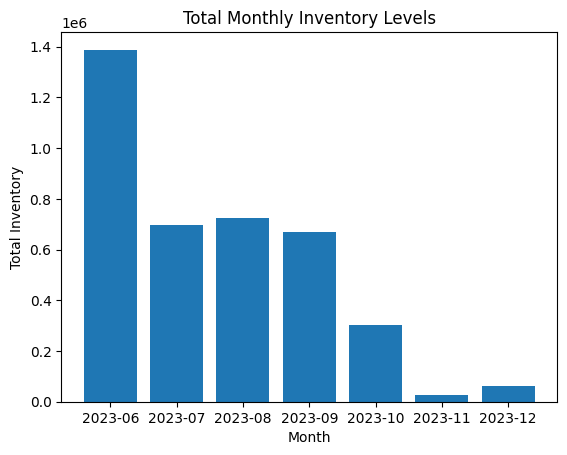

In [ ]:
# Create a bar chart for total monthly inventory levels
monthly_inventory = merged_df.groupby(pd.to_datetime(merged_df['Date']).dt.to_period("M")).sum()

plt.bar(monthly_inventory.index.astype(str), monthly_inventory['Inventory'])
plt.xlabel('Month')
plt.ylabel('Total Inventory')
plt.title('Total Monthly Inventory Levels')
plt.show()
